###### In this project, we intend to develop a model to make predictions for the number of prisoners we have based on the factors like burglary, larceny, man\_slaughter, etc. depending on how many null values these columns have. Further in the next few cells in this training file, we will show up what visualizations we create to understand the factors we need to be taken into consideration.



## Imports



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import math

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

from sklearn.metrics import confusion_matrix

## Data Information and Cleaning



In [2]:
crime_df = pd.read_csv("crimes.csv")

In [3]:
for x in range(17):
    print(crime_df.columns.values[x], crime_df.iloc[:,x].isna().sum())
crime_df = crime_df.dropna(subset=['crime_reporting_change'])

jurisdiction 0
includes_jails 0
year 0
prisoner_count 0
crime_reporting_change 17
crimes_estimated 17
state_population 17
violent_crime_total 17
murder_manslaughter 17
rape_legacy 67
rape_revised 617
robbery 17
agg_assault 17
property_crime_total 17
burglary 17
larceny 17
vehicle_theft 17


In [4]:
print(crime_df ['violent_crime_total'])


1       19582.0
2        3735.0
3       28675.0
4       12190.0
5      212867.0
         ...   
811     18495.0
812     22101.0
813      6633.0
814     17716.0
815      1431.0
Name: violent_crime_total, Length: 799, dtype: float64


In [5]:
# Check for null values and remove null values from columns

crime_df['rape_legacy'] = crime_df['rape_legacy'].fillna(crime_df['rape_legacy'].mean())
crime_df.isnull().sum()

jurisdiction                0
includes_jails              0
year                        0
prisoner_count              0
crime_reporting_change      0
crimes_estimated            0
state_population            0
violent_crime_total         0
murder_manslaughter         0
rape_legacy                 0
rape_revised              600
robbery                     0
agg_assault                 0
property_crime_total        0
burglary                    0
larceny                     0
vehicle_theft               0
dtype: int64

In [6]:
crime_df

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.000000,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.000000,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.000000,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.000000,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0
5,CALIFORNIA,False,2001,157142,False,False,34600463.0,212867.0,2206.0,9960.000000,NaN,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,VIRGINIA,False,2016,29882,False,False,8414380.0,18495.0,482.0,1788.339119,2830.0,4826.0,10357.0,157292.0,20159.0,127285.0,9848.0
812,WASHINGTON,False,2016,17228,False,False,7280934.0,22101.0,195.0,1788.339119,3133.0,5649.0,13124.0,254994.0,49249.0,173423.0,32322.0
813,WEST VIRGINIA,False,2016,5899,False,False,1828637.0,6633.0,85.0,1788.339119,684.0,720.0,5144.0,37282.0,9127.0,25657.0,2498.0
814,WISCONSIN,False,2016,23163,False,False,5772917.0,17716.0,232.0,1788.339119,2005.0,4707.0,10772.0,111911.0,19498.0,82455.0,9958.0


In [7]:
# drop any remaining null values in rows
crime_df = crime_df.drop('rape_revised', axis = 1)
crime_df = crime_df.drop('larceny', axis = 1) 
crime_df = crime_df.drop('robbery', axis = 1)
crime_df = crime_df.drop('vehicle_theft', axis = 1)
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 1 to 815
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jurisdiction            799 non-null    object 
 1   includes_jails          799 non-null    bool   
 2   year                    799 non-null    int64  
 3   prisoner_count          799 non-null    int64  
 4   crime_reporting_change  799 non-null    object 
 5   crimes_estimated        799 non-null    object 
 6   state_population        799 non-null    float64
 7   violent_crime_total     799 non-null    float64
 8   murder_manslaughter     799 non-null    float64
 9   rape_legacy             799 non-null    float64
 10  agg_assault             799 non-null    float64
 11  property_crime_total    799 non-null    float64
 12  burglary                799 non-null    float64
dtypes: bool(1), float64(7), int64(2), object(3)
memory usage: 81.9+ KB


In [8]:
# checking for null values in the each column of the dataset
crime_df.isnull().sum()

jurisdiction              0
includes_jails            0
year                      0
prisoner_count            0
crime_reporting_change    0
crimes_estimated          0
state_population          0
violent_crime_total       0
murder_manslaughter       0
rape_legacy               0
agg_assault               0
property_crime_total      0
burglary                  0
dtype: int64

## Data Visualisation



In [9]:
# Plot 1: Prisoner Count per state

fig = px.line(crime_df, x='jurisdiction', y='prisoner_count', color = 'year')
fig.show()
fig.write_html("prisonerperstate.html")

In [10]:
# Extra Plot 

ans = (crime_df['violent_crime_total']/crime_df['state_population'])
fig = px.scatter(crime_df, x='jurisdiction', y=ans, color='prisoner_count', title = "Crime in states (based on population)", labels = {"state_population":"Population", "violent_crime_total":"Crimes in total"})
fig.show()
fig.write_html("violentcperstate.html")

In [11]:
# Plot 2: Murder-Manslaughter per state

fig = px.bar(crime_df, x='jurisdiction', y='murder_manslaughter', color = 'year', title = "Murder-Manslaughter per State", labels = {"jurisdiction":"States", "murder_manslaughter":"Murder-Manslaughter"})
fig.show()
fig.write_html("manslaughterperstate.html")

In [12]:
# Plot 3: Burglary per state

fig = px.scatter(crime_df, x ='jurisdiction', y = 'burglary', color='prisoner_count', title = "Burglary per State", labels = {"jurisdiction":"States", "burglary":"Burglary"})
fig.show()
fig.write_html("burglaryperstate.html")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

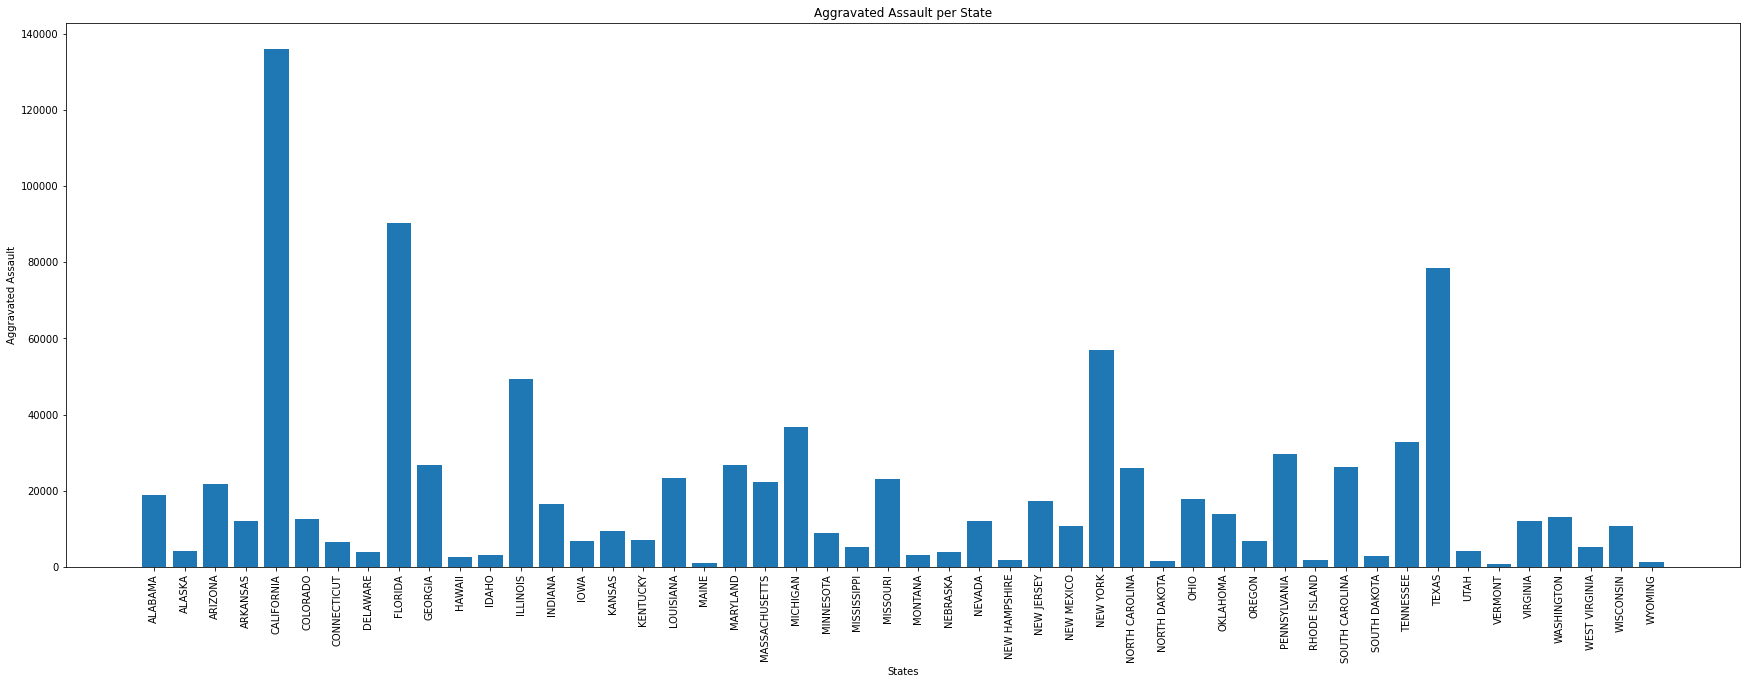

In [13]:
# Plot 4: Assault per state

plt.figure(figsize=(30, 10))
plt.bar(crime_df['jurisdiction'], crime_df['agg_assault'])
plt.title('Aggravated Assault per State')
plt.ylabel("Aggravated Assault")
plt.xlabel("States")
plt.xticks(rotation = 90)

In [14]:
# Plot 5: Includes jail or not based on the crimes

path=['murder_manslaughter','rape_legacy','agg_assault','burglary']
fig = px.bar(crime_df, x="jurisdiction", y=path, hover_data = ["includes_jails","year"], title="Includes jail or not based on the crimes")
fig.show()
fig.write_html("includes_jails.html")

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

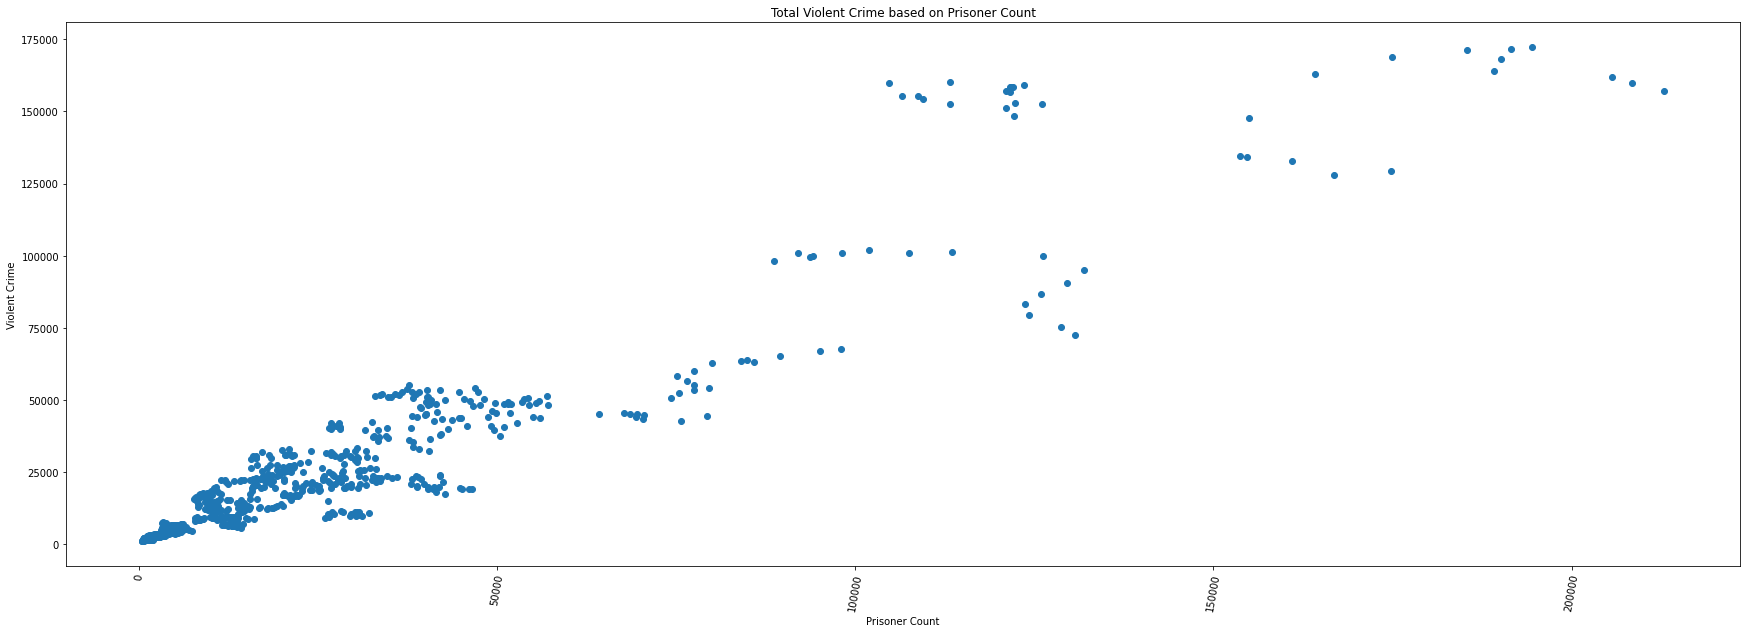

In [15]:
# Plot 6: Total Violent Crime based on the prisoner count
plt.figure(figsize=(30, 10))
plt.scatter(crime_df['violent_crime_total'], crime_df['prisoner_count'])
plt.title('Total Violent Crime based on Prisoner Count')
plt.ylabel("Violent Crime")
plt.xlabel("Prisoner Count")
plt.xticks(rotation = 80)

Text(0.5, 1.0, 'Amount of Prisoners per State')

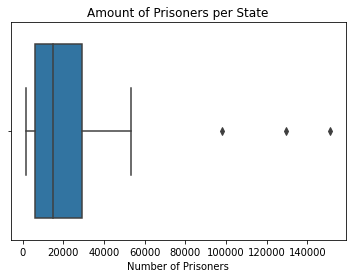

In [16]:
# Plot 7: Amount of prisoners per state

sns.boxplot(x="prisoner_count", data=crime_df.tail(50))
plt.xlabel("Number of Prisoners")
plt.title("Amount of Prisoners per State")

Data Analysis for the above plot:



#### Correlation Plot



In [17]:
corr=crime_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,includes_jails,year,prisoner_count,state_population,violent_crime_total,murder_manslaughter,rape_legacy,agg_assault,property_crime_total,burglary
includes_jails,1.000000,0.000653,-0.212966,-0.259495,-0.237818,-0.259815,-0.266943,-0.240870,-0.259262,-0.261738
year,0.000653,1.000000,0.006612,0.031225,-0.047506,-0.021080,-0.036419,-0.049170,-0.080039,-0.066611
prisoner_count,-0.212966,0.006612,1.000000,0.946487,0.941173,0.942476,0.916983,0.926015,0.968866,0.953372
state_population,-0.259495,0.031225,0.946487,1.000000,0.960609,0.953897,0.896254,0.934605,0.951278,0.917524
violent_crime_total,-0.237818,-0.047506,0.941173,0.960609,1.000000,0.969505,0.913240,0.994019,0.965846,0.939681
murder_manslaughter,-0.259815,-0.021080,0.942476,0.953897,0.969505,1.000000,0.890569,0.952649,0.949806,0.925517
rape_legacy,-0.266943,-0.036419,0.916983,0.896254,0.913240,0.890569,1.000000,0.902545,0.937447,0.925981
agg_assault,-0.240870,-0.049170,0.926015,0.934605,0.994019,0.952649,0.902545,1.000000,0.954541,0.932111
property_crime_total,-0.259262,-0.080039,0.968866,0.951278,0.965846,0.949806,0.937447,0.954541,1.000000,0.985963
burglary,-0.261738,-0.066611,0.953372,0.917524,0.939681,0.925517,0.925981,0.932111,0.985963,1.000000


In [18]:
# A correlation plot helps provide a visualization of the correlation between independent variables in the dataset. Correlation plots have three different types of correlation between variables; positive correlation, negative correlation, and zero correlation. When two variables increase or decrease together, they have a positive correlation, which is represented by a 1. When one variable increases and the other variable decreases, it is a negative correlation, which is represented by a -1. When two variables have no impact on each other, there is zero correlation, which is represented by a 0. Collinearity is the correlation between variables that expresses a linear relation in a regression model. Correlation indicates the strength of the linear relationship that might be existing between two variables. High Collinearity among these variables causes over fitting in the model. To avoid this its suggested to drop such variables.

## Feature Selection & Extraction



## Models



#### Label Encoding



In [19]:
labelencoder = LabelEncoder()
crime_df['jurisdiction Labels'] = labelencoder.fit_transform(crime_df["jurisdiction"])
crime_df['includes_jails Labels'] = labelencoder.fit_transform(crime_df["includes_jails"])
crime_df['jurisdiction'] = crime_df['jurisdiction Labels']
crime_df['includes_jails'] = crime_df['includes_jails Labels']
crime_df

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,agg_assault,property_crime_total,burglary,jurisdiction Labels,includes_jails Labels
1,0,0,2001,24741,False,False,4468912.0,19582.0,379.0,1369.000000,12250.0,173253.0,40642.0,0,0
2,1,1,2001,4570,False,False,633630.0,3735.0,39.0,501.000000,2681.0,23160.0,3847.0,1,1
3,2,0,2001,27710,False,False,5306966.0,28675.0,400.0,1518.000000,17889.0,293874.0,54821.0,2,0
4,3,0,2001,11489,False,False,2694698.0,12190.0,148.0,892.000000,8969.0,99106.0,22196.0,3,0
5,4,0,2001,157142,False,False,34600463.0,212867.0,2206.0,9960.000000,136087.0,1134189.0,232273.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,45,0,2016,29882,False,False,8414380.0,18495.0,482.0,1788.339119,10357.0,157292.0,20159.0,45,0
812,46,0,2016,17228,False,False,7280934.0,22101.0,195.0,1788.339119,13124.0,254994.0,49249.0,46,0
813,47,0,2016,5899,False,False,1828637.0,6633.0,85.0,1788.339119,5144.0,37282.0,9127.0,47,0
814,48,0,2016,23163,False,False,5772917.0,17716.0,232.0,1788.339119,10772.0,111911.0,19498.0,48,0


In [20]:
training_features = ['jurisdiction','includes_jails','state_population','violent_crime_total','murder_manslaughter','rape_legacy','agg_assault','property_crime_total','burglary']
target = 'prisoner_count'

In [21]:
#new_cdf = jurisdiction, includes_jail, state_population, violent_crime_total, rape_revised, murder_manslaughter, agg_assault, property_crime_total, burglary 
train, test = train_test_split(crime_df, test_size=0.2, shuffle=True)
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]
print(test_X.shape[0], test_Y.shape[0])
train_X

160 160


,jurisdiction,includes_jails,state_population,violent_crime_total,murder_manslaughter,rape_legacy,agg_assault,property_crime_total,burglary
735,20,0,6794422.0,26562.0,128.0,1608.0,19071.0,114871.0,21890.0
572,10,1,1390090.0,3378.0,21.0,279.0,1953.0,43419.0,7653.0
531,20,0,6607003.0,28232.0,184.0,1654.0,19626.0,148829.0,36403.0
578,16,0,4379730.0,9852.0,201.0,1312.0,4792.0,112800.0,29877.0
373,15,0,2802134.0,11554.0,113.0,1226.0,8534.0,94882.0,19651.0
...,...,...,...,...,...,...,...,...,...
412,3,0,2889450.0,14905.0,179.0,1378.0,10772.0,109078.0,34753.0
145,42,0,22103374.0,122246.0,1422.0,8025.0,75782.0,1016735.0,219877.0
86,34,0,11408699.0,40128.0,526.0,4809.0,16922.0,428976.0,99164.0
446,37,0,12604767.0,48188.0,664.0,3626.0,26394.0,277182.0,54772.0


#### Linear Model



In [22]:
model = LinearRegression()
model.fit(train_X, train_Y)

LinearRegression()

In [23]:
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

In [24]:
# Evaluation Metrics
print("Mean Absolute Error: ", mean_absolute_error(np.array(test_Y), test_pred_Y))
print("Mean Squared Error:", mean_squared_error(test_Y, test_pred_Y))
print("R-Squared value:", r2_score(test_Y, test_pred_Y))

# Accuracy
result = model.score(test_X, test_Y)
print("Accuracy: ", result)

Mean Absolute Error:  5247.344226336631
Mean Squared Error: 65197726.90139301
R-Squared value: 0.9375118517267501
Accuracy:  0.9360802523262186


#### Random Forest Regressor



In [25]:
regressor_rf = RandomForestRegressor(random_state = 40)

In [0]:
# Hyper Parameter Tuning using GridSearchCV

parameters = {"n_estimators" : [2000, 3000, 4000], "max_depth":[2,4,6,8,10], "max_features": ["sqrt", "log2"]}
grid_rf = GridSearchCV(estimator=regressor_rf, param_grid=parameters, cv= 4)
grid_rf.fit(train_X, train_Y)

In [0]:
# Finding the best parameters
grid_rf.best_params_

In [0]:
rfr = RandomForestRegressor(random_state=42, max_features='sqrt', n_estimators= 2000, max_depth=10)
rfr.fit(train_X, train_Y)
random_result = rfr.predict(test_X)

# Evaluation Metrics
print("Mean Absolute Error: ", mean_absolute_error(np.array(test_Y), random_result))
print("Mean Squared Error:", mean_squared_error(test_Y, random_result))
print("R-Squared value:", r2_score(test_Y, random_result))


# Accuracy
resultrf = rfr.score(test_X, test_Y)
print("Accuracy: ", resultrf)

#### Decision Tree Regressor



In [0]:
# Hyper Parameter Tuning using GridSearchCV

regressor_dt = DecisionTreeRegressor(random_state = 0)
parameters = {"criterion" : ["squared_error", "absolute_error", "poisson"], "max_depth":[2,4,6,8,10], "splitter": ["best", "random"]}
grid_dt = GridSearchCV(estimator=regressor_dt, param_grid=parameters, cv= 4)
grid_dt.fit(train_X, train_Y)

In [0]:
# Finding the best parameters
grid_dt.best_params_

In [0]:
dtr = DecisionTreeRegressor(criterion = "absolute_error", max_depth=10, splitter = "best")
dtr.fit(train_X, train_Y)
decision_result = dtr.predict(test_X)

# Evaluation Metrics
print("Mean Absolute Error: ", mean_absolute_error(np.array(test_Y), decision_result))
print("Mean Squared Error: ", mean_squared_error(test_Y, decision_result))
print("R-Squared value: ", r2_score(test_Y, decision_result))

# Accuracy
resultdt = dtr.score(test_X, test_Y)
print("Accuracy: ",resultdt)

## Visualizations for the Model



In [0]:
# Linear Regression Plot between prisoner count and total violent crimes
sns.lmplot(x="prisoner_count", y="violent_crime_total",data=crime_df)

In [0]:
# Decision Tree
plt.figure(figsize=(400,30))
a = tree.plot_tree(dtr,
                   feature_names = training_features,
                   class_names = crime_df['prisoner_count'],
                   filled = True,
                   fontsize=12)
plt.show()

In [0]:
# Feature Importance in decision tree
pd.Series(dtr.feature_importances_, index = training_features).plot(kind = "bar")

In [0]:
# Feature importance in Random Forest
pd.Series(rfr.feature_importances_, index = training_features).plot(kind = "bar")

## Conclusion



After doing the data analysis and model evaluation, our team came to a conclusion that the model Random Forest would work best for our dataset. Random Forest gave better accuracy after performing GridSearchCV in comparison to the linear Regression and decision trees, 

in which reduces the overfitting problems in decision trees and reduces the variance. Compares to decision tree, random forests are a stronger modeling technique and much more robust than a single decision tree, as they can aggregate many decision trees to limit overfitting as well as error due to bias and thefore yield usegul results. Random forests also consist of multiple single trees each based on a random sample of the training data, which were typically more accurate than single decision trees. 

